## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [3]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [4]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(df.workclass.unique())
print(df['marital-status'].unique())
print(df.occupation.unique())
print(df.relationship.unique())
print(df.sex.unique())
print(df.race.unique())
print(df['native-country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' Male' ' Female']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatema

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [7]:
df.loc[df['native-country']==' ?','native-country'] = None
df.loc[df['workclass']==' ?','workclass'] = None
df.loc[df['occupation']==' ?','occupation'] = None
cleared = df.dropna().copy()


Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [8]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

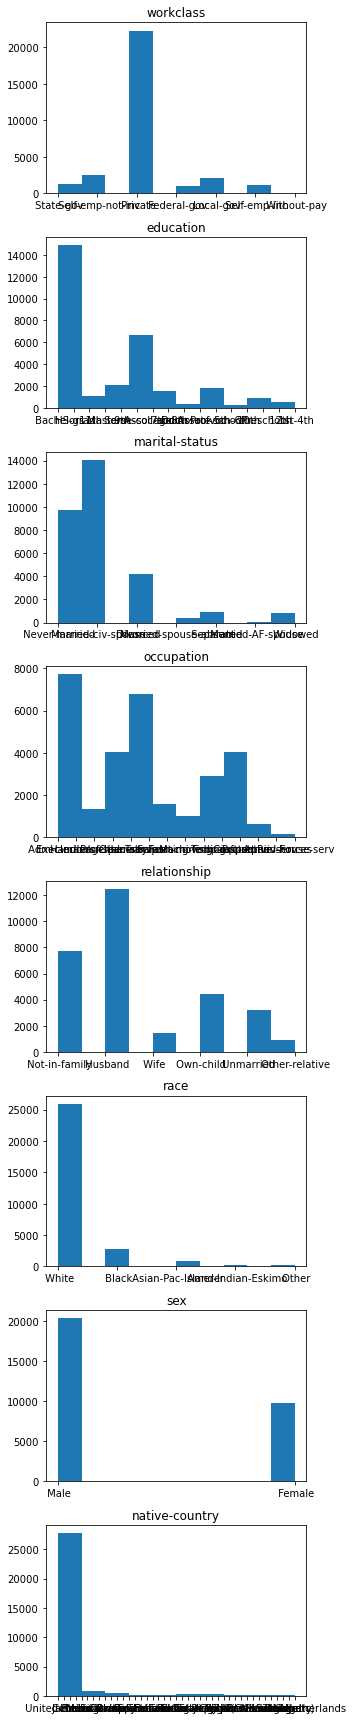

In [9]:
#plot the categroical columns to see what we are dealing with
numerical_columns = ['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
fig,axs = plt.subplots(len(numerical_columns))
fig.set_figheight(3*len(numerical_columns))
fig.set_figwidth(5)
for i,column in enumerate(numerical_columns):
    axs[i].hist(cleared[column],bins=10)
    axs[i].set_title(column)
    plt.tight_layout()

    
    

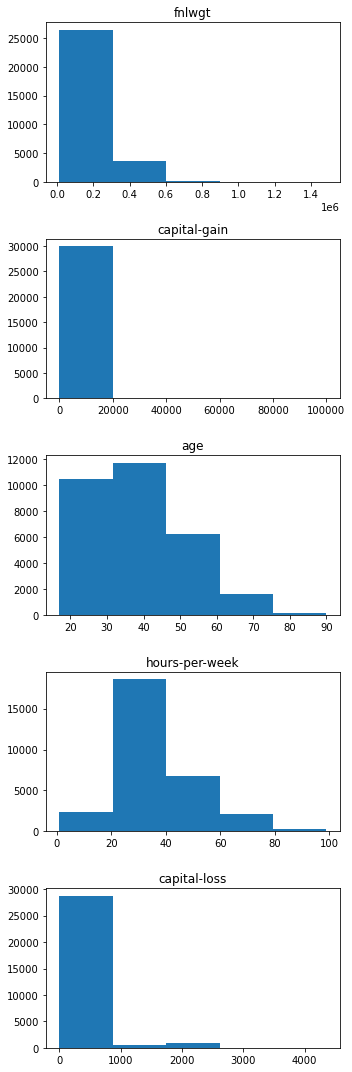

In [10]:
#plot the numerical columns
numerical_columns = ['fnlwgt','capital-gain','age','hours-per-week','capital-loss']
fig,axs = plt.subplots(len(numerical_columns))
fig.set_figheight(3*len(numerical_columns))
fig.set_figwidth(5)
for i,column in enumerate(numerical_columns):
    axs[i].hist(cleared[column],bins=5)
    axs[i].set_title(column)
    plt.tight_layout()

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [12]:
cleared.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [13]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
encode = OrdinalEncoder()

encode2 = OneHotEncoder()
cleared[['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']] = encode.fit_transform(cleared[['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
cleared

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,<=50K
1,50,4.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,<=50K
2,38,2.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,<=50K
3,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,<=50K
4,28,2.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,<=50K
32557,40,2.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,>50K
32558,58,2.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,<=50K
32559,22,2.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,<=50K


In [14]:
X = cleared.iloc[:,:-1].values
y= cleared.target.values
lab_en = LabelEncoder()
y = lab_en.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)


In [15]:
# #train / test... you know the drill

# models = {
#     'logistic-regression': {
#          'model' : LogisticRegression(),
#          'params': {'C':[1,5,10]}
#     },
#     'svm': {
#         'model': svm.SVC(),
#         'params': {'kernel':['linear','rbf'],
#                    'C':[1,10]}

#     },
#     'RF' : {
#         'model' : LogisticRegression(),
#         'params': {'n_estimators':[5,15,20]}
#     }

# }

In [16]:
# for model,par in models.items():
#     clf_grid = GridSearchCV(par['model'],par['params'])
#     clf_grid.fit(X_train,y_train)

# Discussion of results

In [17]:
# grid_svm = GridSearchCV(svm.SVC(),{'kernel':['linear','rbf'],'C':[1,10]})
# grid_svm.fit(X_train,y_train)

In [18]:
# clf = svm.SVC(kernel='linear',C=10)
# clf.fit(X_train,y_train)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
X_ts_sc = sc.transform(X_test)
mod = RandomForestClassifier()
mod.fit(X_tr_sc,y_train)
pred = mod.predict(X_ts_sc)

accuracy_score(y_test,pred)

0.8519173389324787

In [21]:
lin_mod = LogisticRegression()
lin_mod.fit(X_tr_sc,y_train)
pred_lin = lin_mod.predict(X_ts_sc)
accuracy_score(y_test,pred_lin)

0.8133495413857885